# Практика_03_Задача кластеризации

<h2 style="text-align: center;"><b>Реализуем один из классических методов</b></h2>

In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (9,5)

In [2]:
# Загружаем набор данных
iris_df = datasets.load_iris()
 
# Методы, доступные для набора данных
print(dir(iris_df))
 
# Признаки
print(iris_df.feature_names)
 
# Метки
print(iris_df.target)
 
# Имена меток
print(iris_df.target_names)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


Ирисы Фишера - самый популярный в статистической литературе набор данных, часто используемый для иллюстрации работы различных алгоритмов

Выборка состоит из 150 экземпляров ирисов трех видов, для которых измерялись четыре характеристики: длина и ширина чашелистика (Sepal.Length и Sepal.Width), длина и ширина лепестка (Petal.Length и Petal.Width).

In [3]:
print (iris_df.data[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


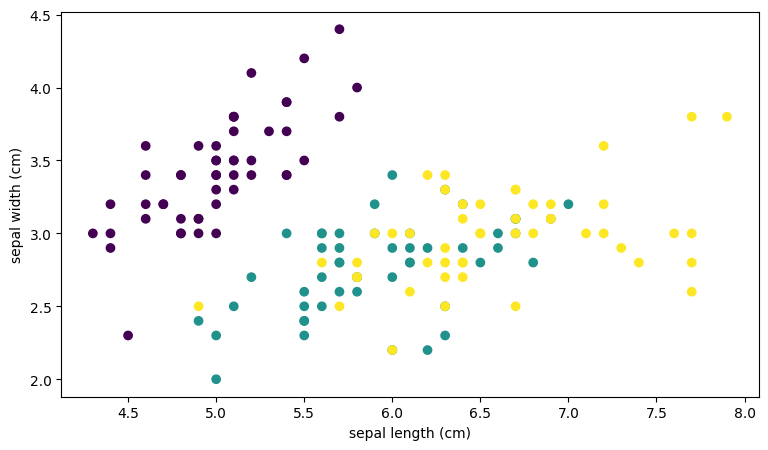

In [4]:
# Разделение набора данных
x_axis = iris_df.data[:, 0]  # Sepal Length
y_axis = iris_df.data[:, 1]  # Sepal Width
 
# Построение
plt.xlabel(iris_df.feature_names[0])
plt.ylabel(iris_df.feature_names[1])
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

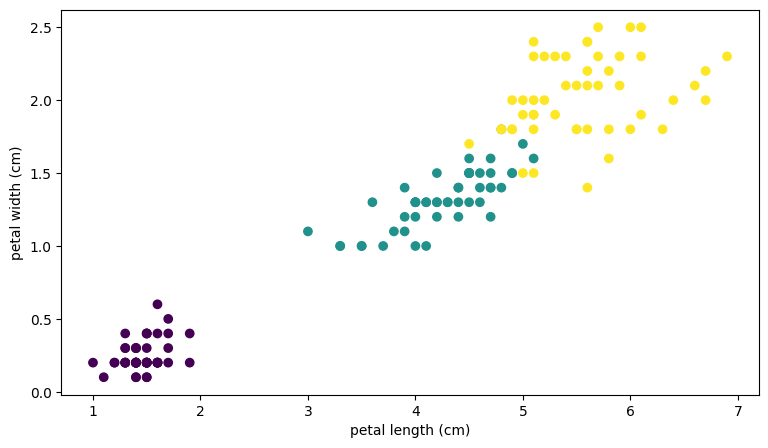

In [5]:
# Разделение набора данных
x_axis = iris_df.data[:, 2]  # Sepal Length
y_axis = iris_df.data[:, 3]  # Sepal Width
 
# Построение
plt.xlabel(iris_df.feature_names[2])
plt.ylabel(iris_df.feature_names[3])
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

На диаграмме фиолетовым цветом обозначен вид Setosa, зеленым – Versicolor и желтым – Virginica. При построении были взяты лишь два признака.

Цель кластеризации данных состоит в том, чтобы выделить группы примеров с похожими чертами и определить соответствие примеров и кластеров. При этом исходно у нас нет примеров такого разбиения. Это аналогично тому, как если бы в приведенном наборе данных у нас не было меток, как на рисунке ниже.

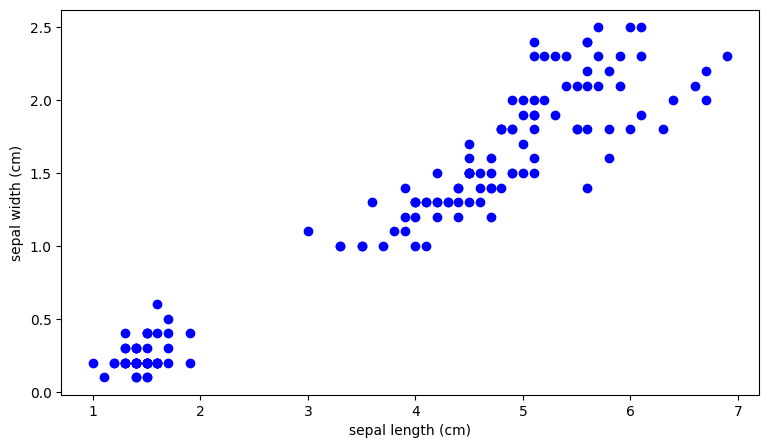

In [6]:
plt.xlabel(iris_df.feature_names[0])
plt.ylabel(iris_df.feature_names[1])
plt.scatter(x_axis, y_axis, c='blue')
plt.show()

In [7]:
from pandas import DataFrame
iris_frame = DataFrame(iris_df.data)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris_df.feature_names
# Добавляем столбец с целевой переменной:  
iris_frame['target'] = iris_df.target
# Для наглядности добавляем столбец с сортами:  
iris_frame['name'] = iris_frame.target.apply(lambda x : iris_df.target_names[x])
# Смотрим, что получилось:
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


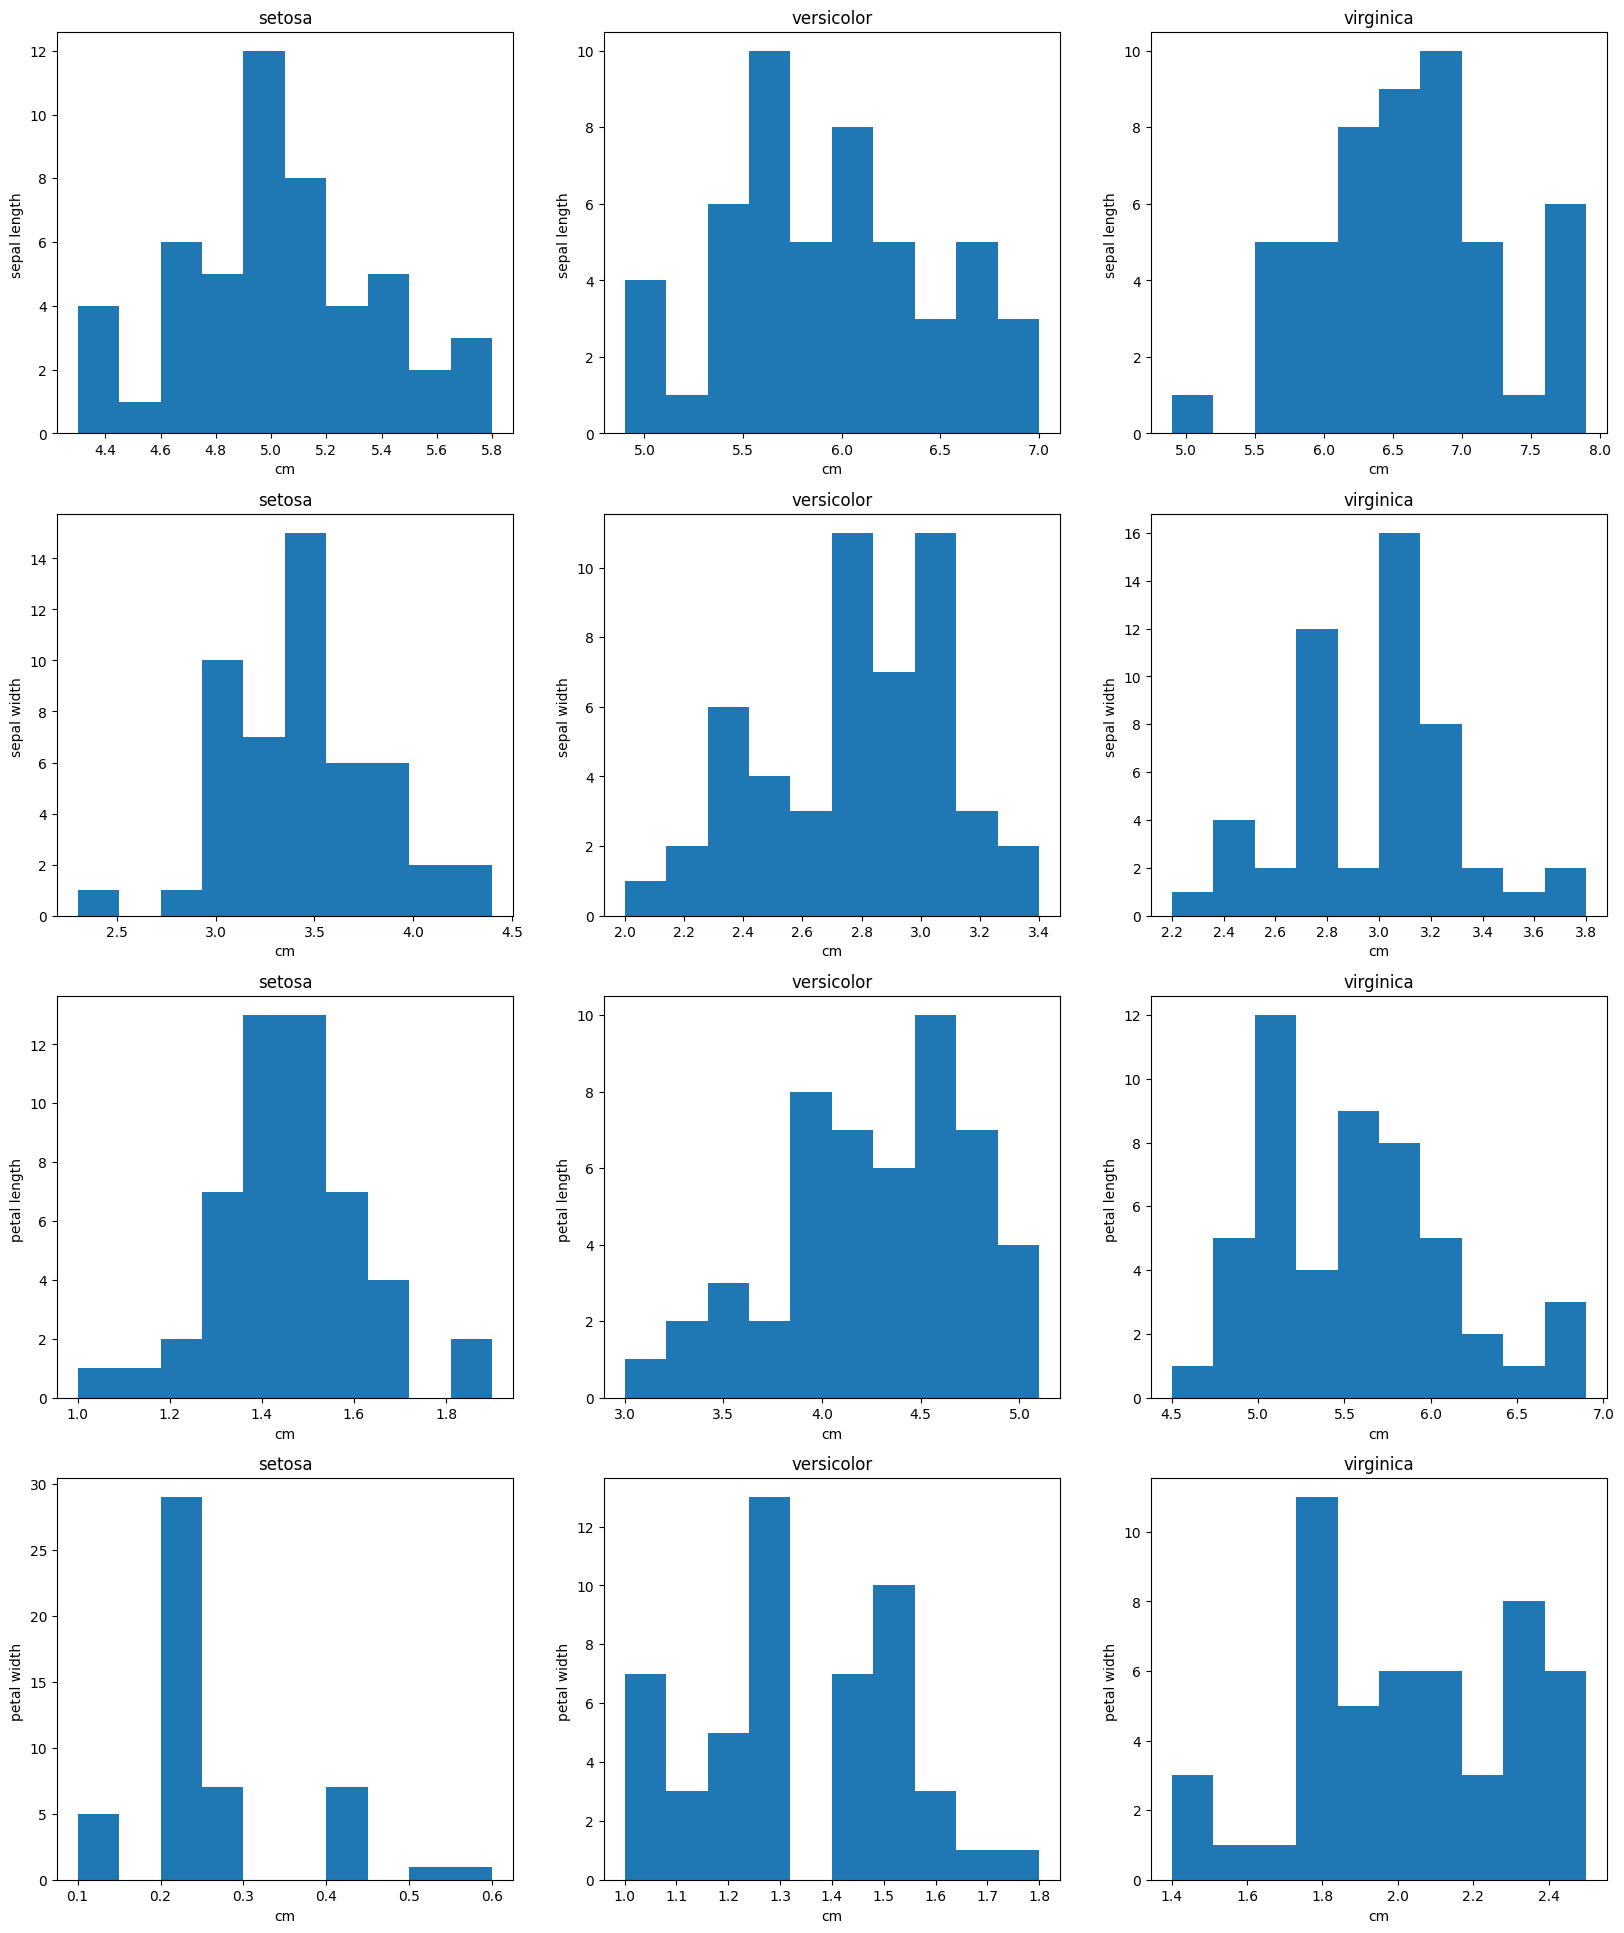

In [8]:
%pylab inline
# Строим гистограммы по каждому признаку: 
pyplot.figure(figsize(20, 24))
plot_number = 0
for feature_name in iris_df['feature_names']:
    for target_name in iris_df['target_names']:
        plot_number += 1
        pyplot.subplot(4, 3, plot_number)
        pyplot.hist(iris_frame[iris_frame.name == target_name][feature_name])
        pyplot.title(target_name)
        pyplot.xlabel('cm')
        pyplot.ylabel(feature_name[:-4])

## Библиотека seaborn

In [9]:
!uv add seaborn

Resolved 120 packages in 2ms
Audited 116 packages in 4ms


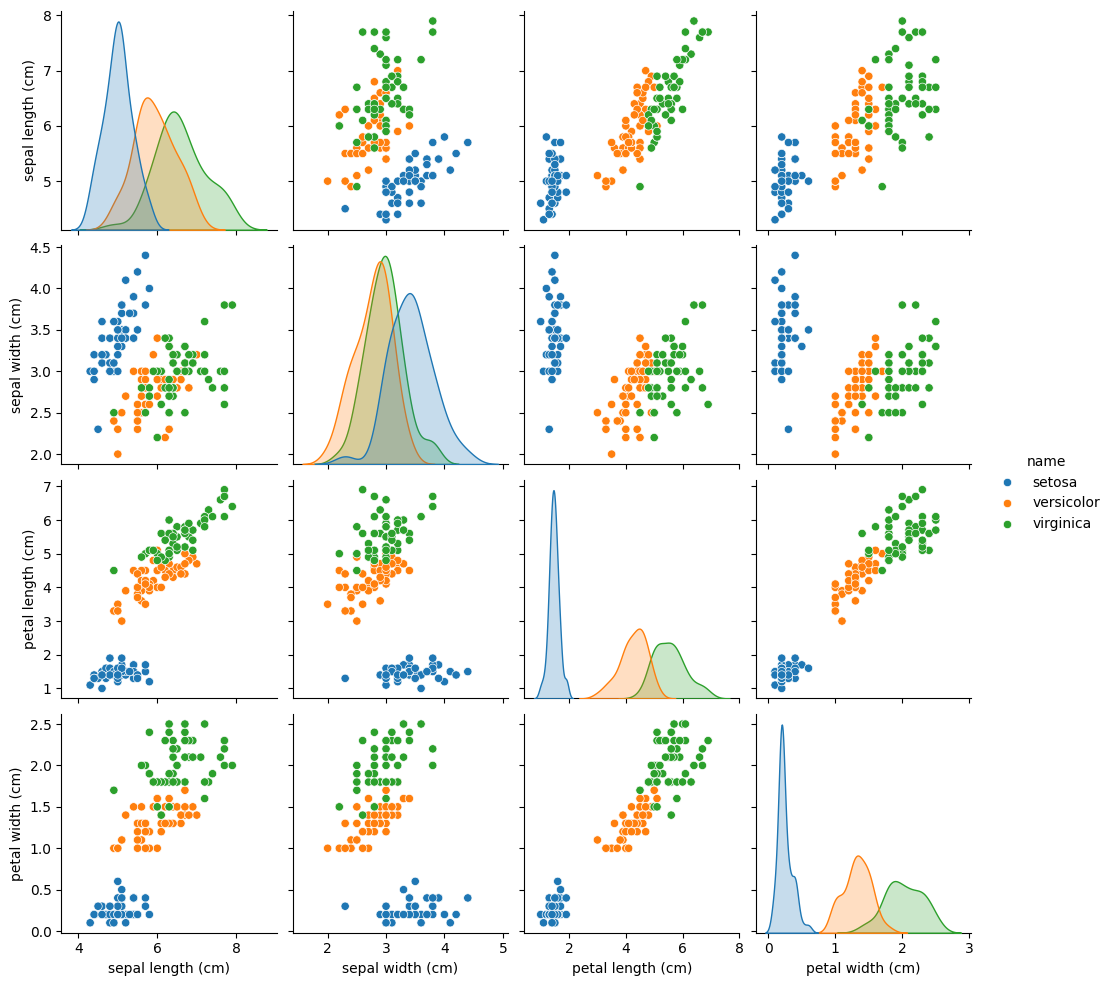

In [10]:
import seaborn as sns
sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

## Pearson correlation coefficient

In [11]:
iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


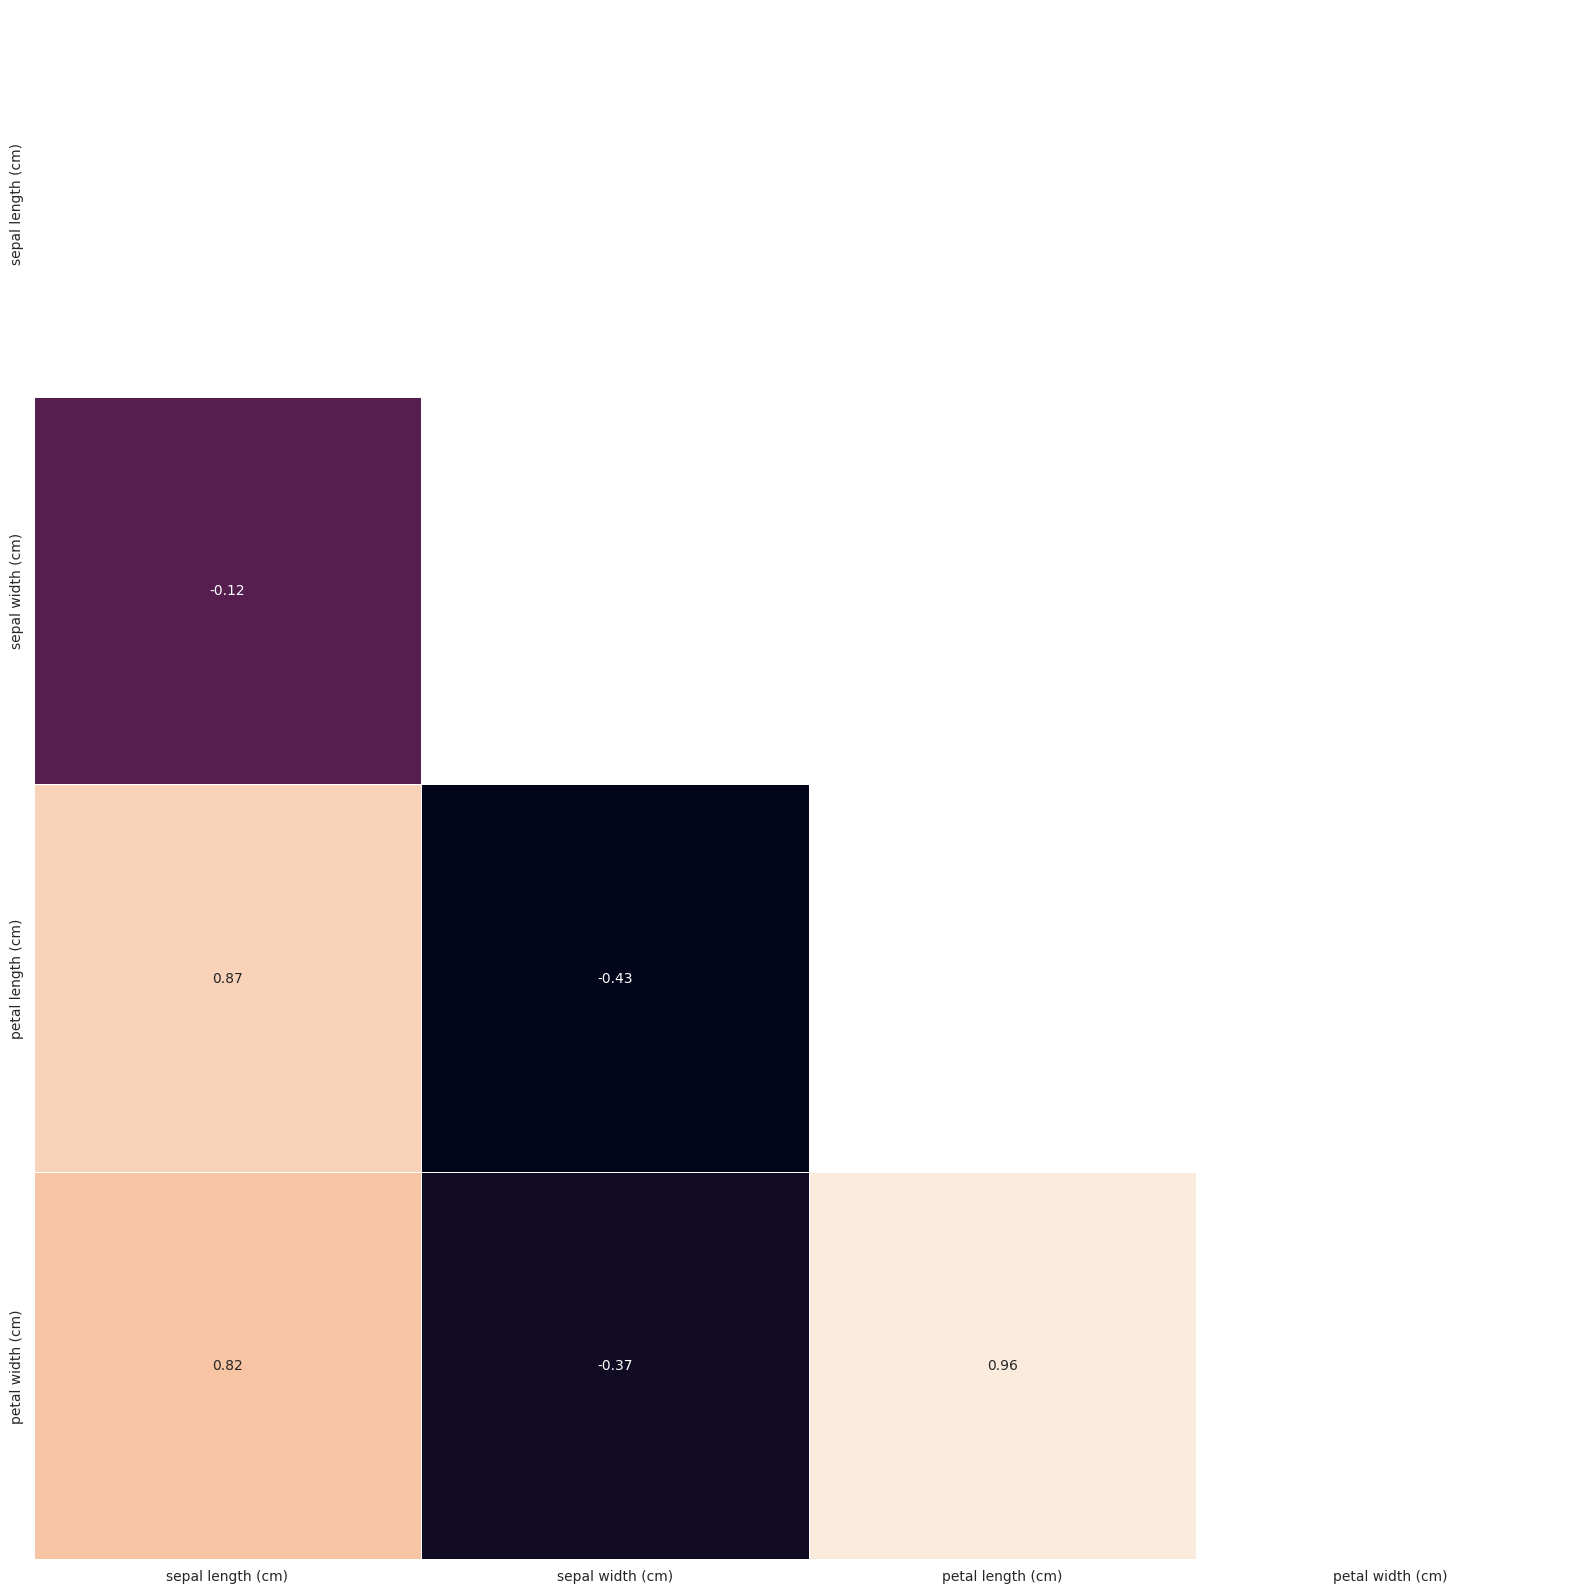

In [12]:
corr = iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     ax = sns.heatmap(corr, mask=mask, square=True, cbar=False, annot=True, linewidths=.5)

### Задача – используя все имеющиеся данные (исключая ответы), предсказать соответствие объектов выборки их классам, сформировав таким образом кластеры.

## Метод k-средних

Наиболее популярным алгоритмом кластеризации данных является метод k-средних. Это итеративный алгоритм кластеризации, основанный на минимизации суммарных квадратичных отклонений точек кластеров от центроидов (средних координат) этих кластеров.

Первоначально выбирается желаемое количество кластеров. Поскольку нам известно, что в нашем наборе данных есть 3 класса, установим параметр модели n_clusters равный трем.

Теперь случайным образом из входных данных выбираются три элемента выборки, в соответствие которым ставятся три кластера, в каждый из которых теперь включено по одной точке, каждая при этом является центроидом этого кластера.

Далее ищем ближайшего соседа текущего центроида. Добавляем точку к соответствующему кластеру и пересчитываем положение центроида с учетом координат новых точек. Алгоритм заканчивает работу, когда координаты каждого центроида перестают меняться. Центроид каждого кластера в результате представляет собой набор значений признаков, описывающих усредненные параметры выделенных классов.

In [13]:
from sklearn.cluster import KMeans

# Описываем модель
model = KMeans(n_clusters=3) #random_state = 111
 
# Проводим моделирование
model.fit(iris_df.data)
 
# Предсказание на единичном примере
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])
 
# Предсказание на всем наборе данных
all_predictions = model.predict(iris_df.data)
 
# Выводим предсказания
print(predicted_label)
print(all_predictions)

[1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Алгоритм не знает ничего о нумерации классов, и числа 0, 1, 2 – это лишь номера кластеров, определенных в результате работы алгоритма. Так как исходные точки выбираются случайным образом, вывод будет меняться от одного запуска к другому.

Характерной особенностью набора данных ирисов Фишера является то, что один класс (Setosa) легко отделяется от двух остальных. Это заметно и в приведенном примере.

In [14]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
#from sklearn import cross_validation
from sklearn import metrics

train_data, test_data, train_labels, test_labels = train_test_split(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame[['target']], test_size = 0.3)

model = KMeans(n_clusters=3, random_state = 42)
model.fit(train_data)
model_predictions = model.predict(test_data)

print (metrics.accuracy_score(test_labels, model_predictions))
print (metrics.classification_report(test_labels, model_predictions))

0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      11.0
           1       0.00      0.00      0.00      14.0
           2       0.00      0.00      0.00      20.0

    accuracy                           0.00      45.0
   macro avg       0.00      0.00      0.00      45.0
weighted avg       0.00      0.00      0.00      45.0



## Иерархическая кластеризация

Представляет собой алгоритм, который строит иерархию кластеров. Этот алгоритм начинает работу с того, что каждому экземпляру данных сопоставляется свой собственный кластер. Затем два ближайших кластера объединяются в один и так далее, пока не будет образован один общий кластер.

Результат иерархической кластеризации может быть представлен с помощью дендрограммы.

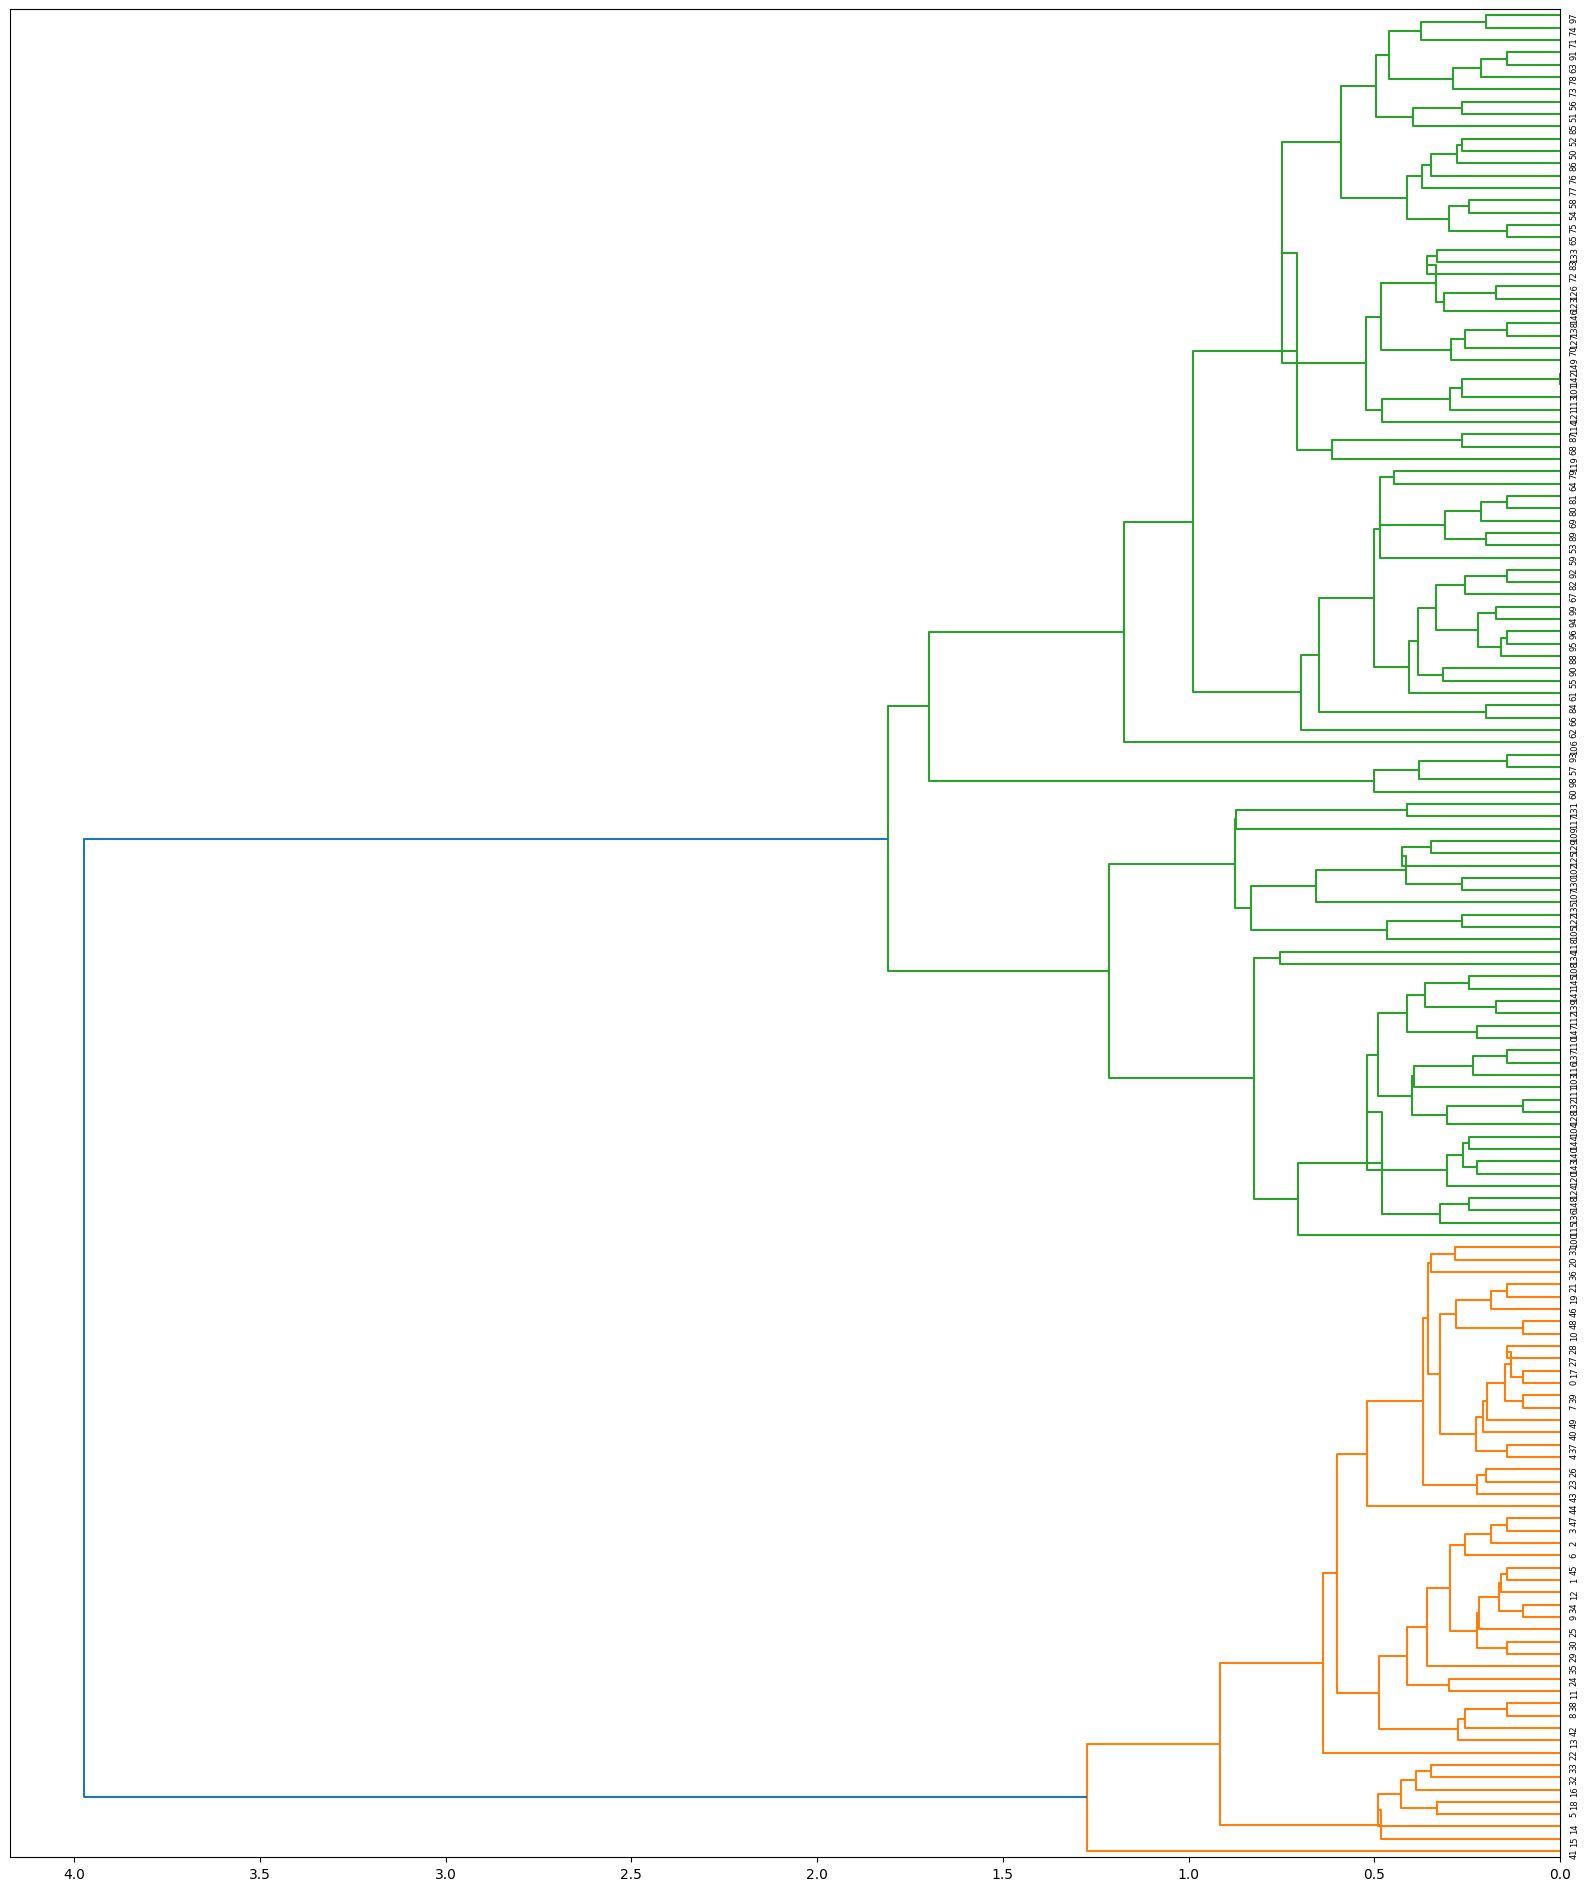

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram

iris_frame_clear = iris_frame.drop(['target', 'name'], axis=1)
# Извлекаем измерения как массив NumPy
samples = iris_frame_clear.values

# Реализация иерархической кластеризации при помощи функции linkage
# Строим дендрограмму, указав параметры удобные для отображения
Z = linkage(samples, method='centroid', metric='euclidean')
_ = dendrogram(Z, leaf_font_size=6, leaf_rotation=90, orientation='left')

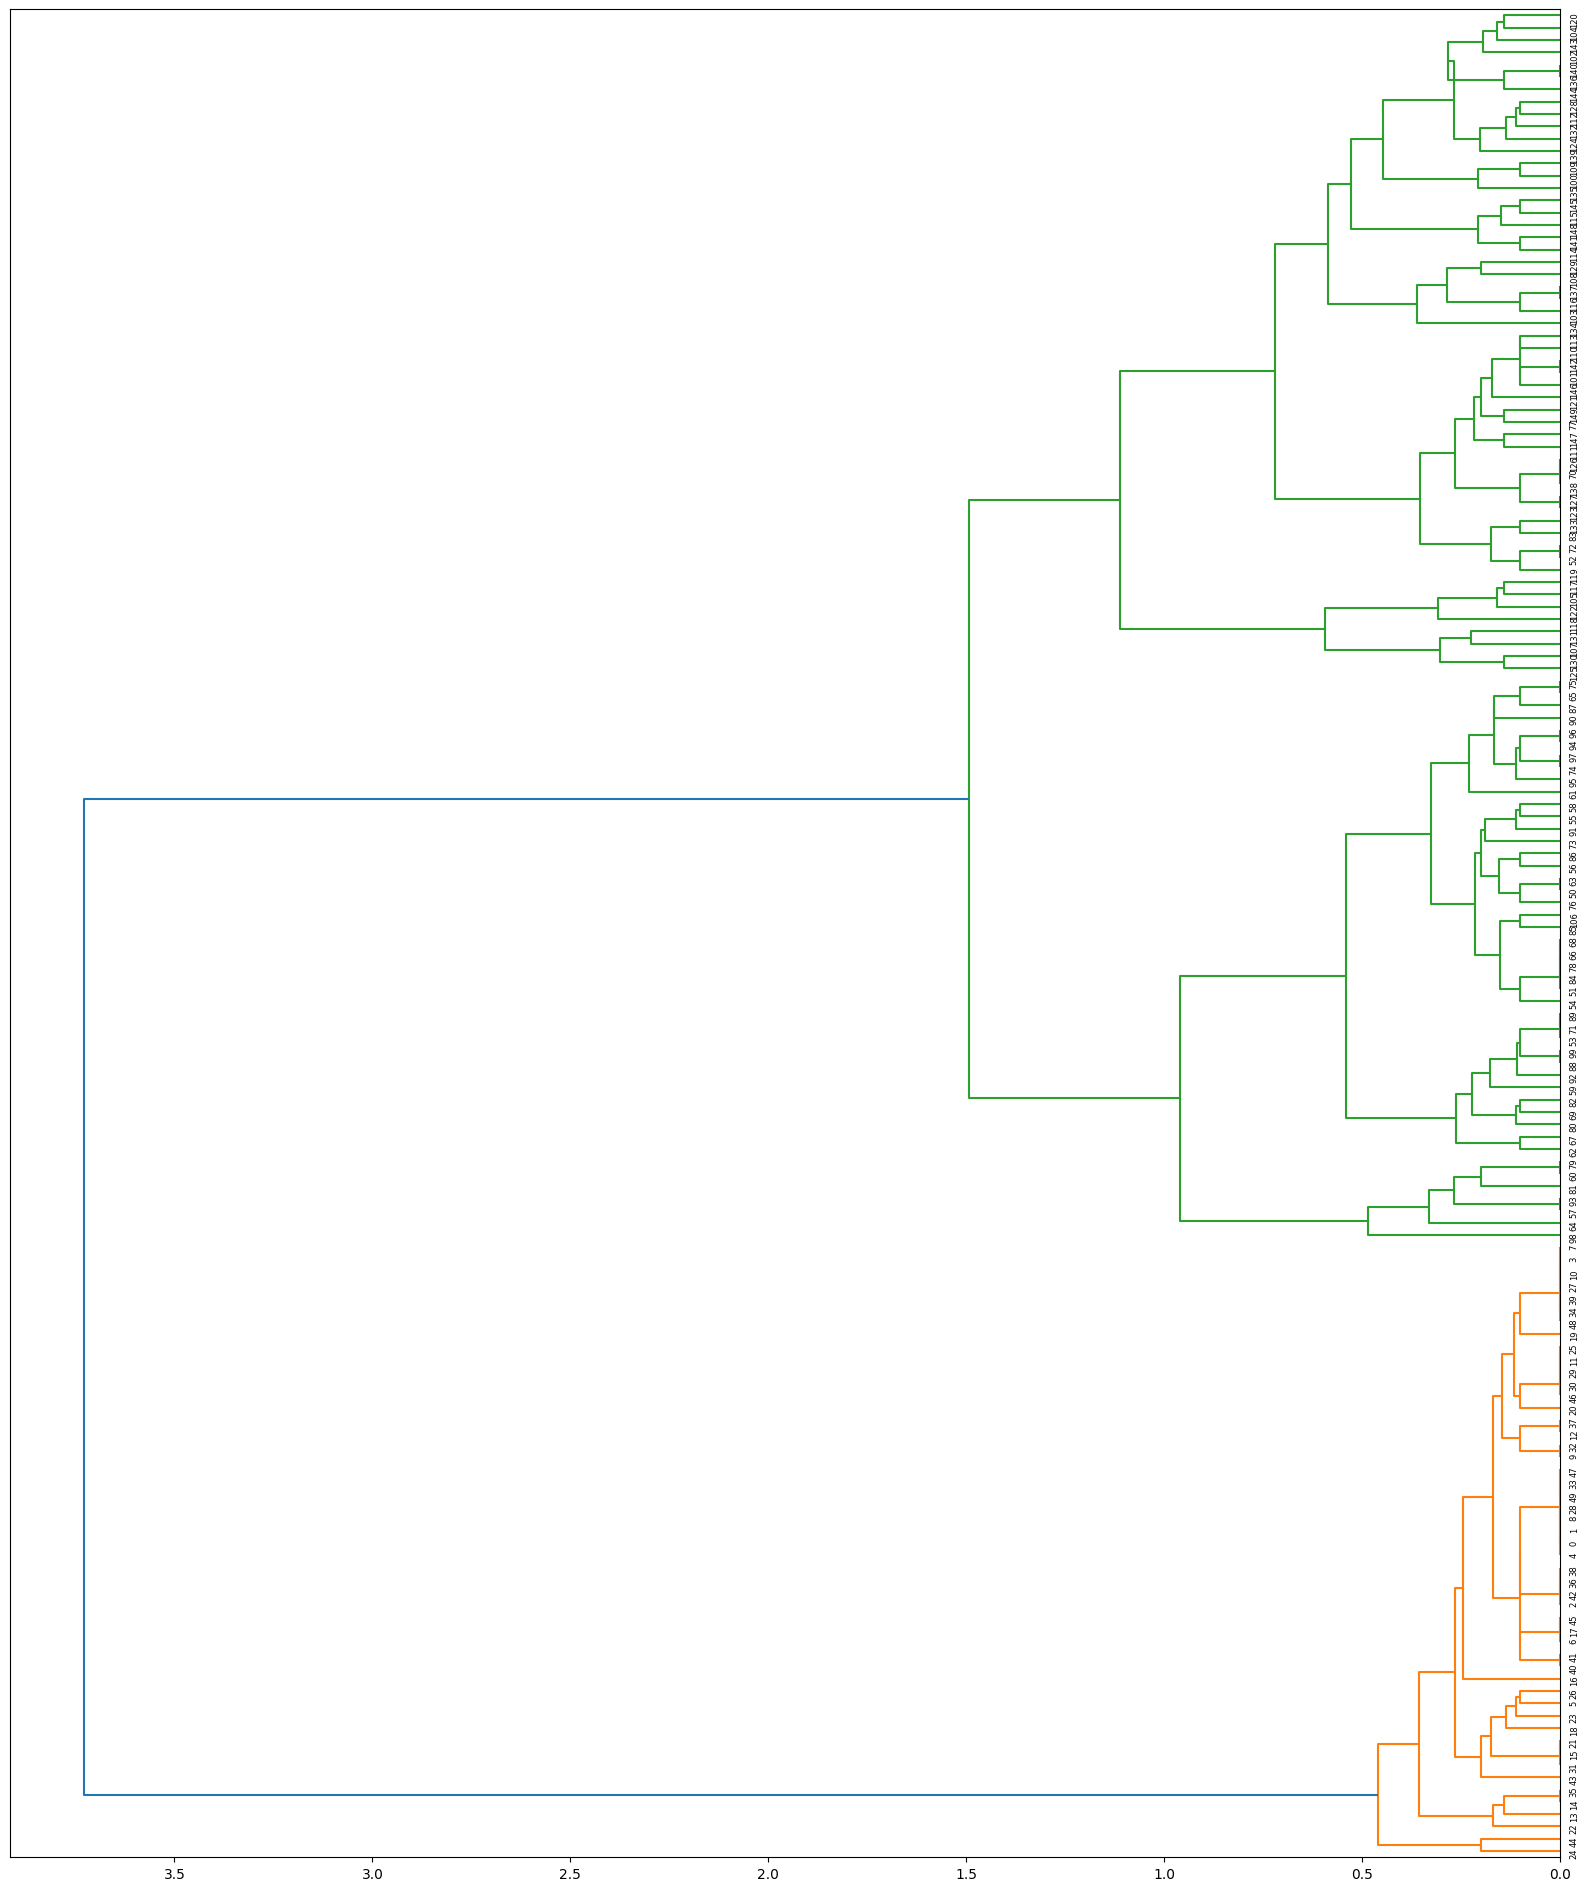

In [16]:
iris_frame_clear2 = iris_frame_clear.drop(['sepal length (cm)','sepal width (cm)'], axis=1)
# Извлекаем измерения как массив NumPy
samples2 = iris_frame_clear2.values

# Реализация иерархической кластеризации при помощи функции linkage
# Строим дендрограмму, указав параметры удобные для отображения
Z = linkage(samples2, method='centroid', metric='euclidean')
_ = dendrogram(Z, leaf_font_size=6, leaf_rotation=90, orientation='left')

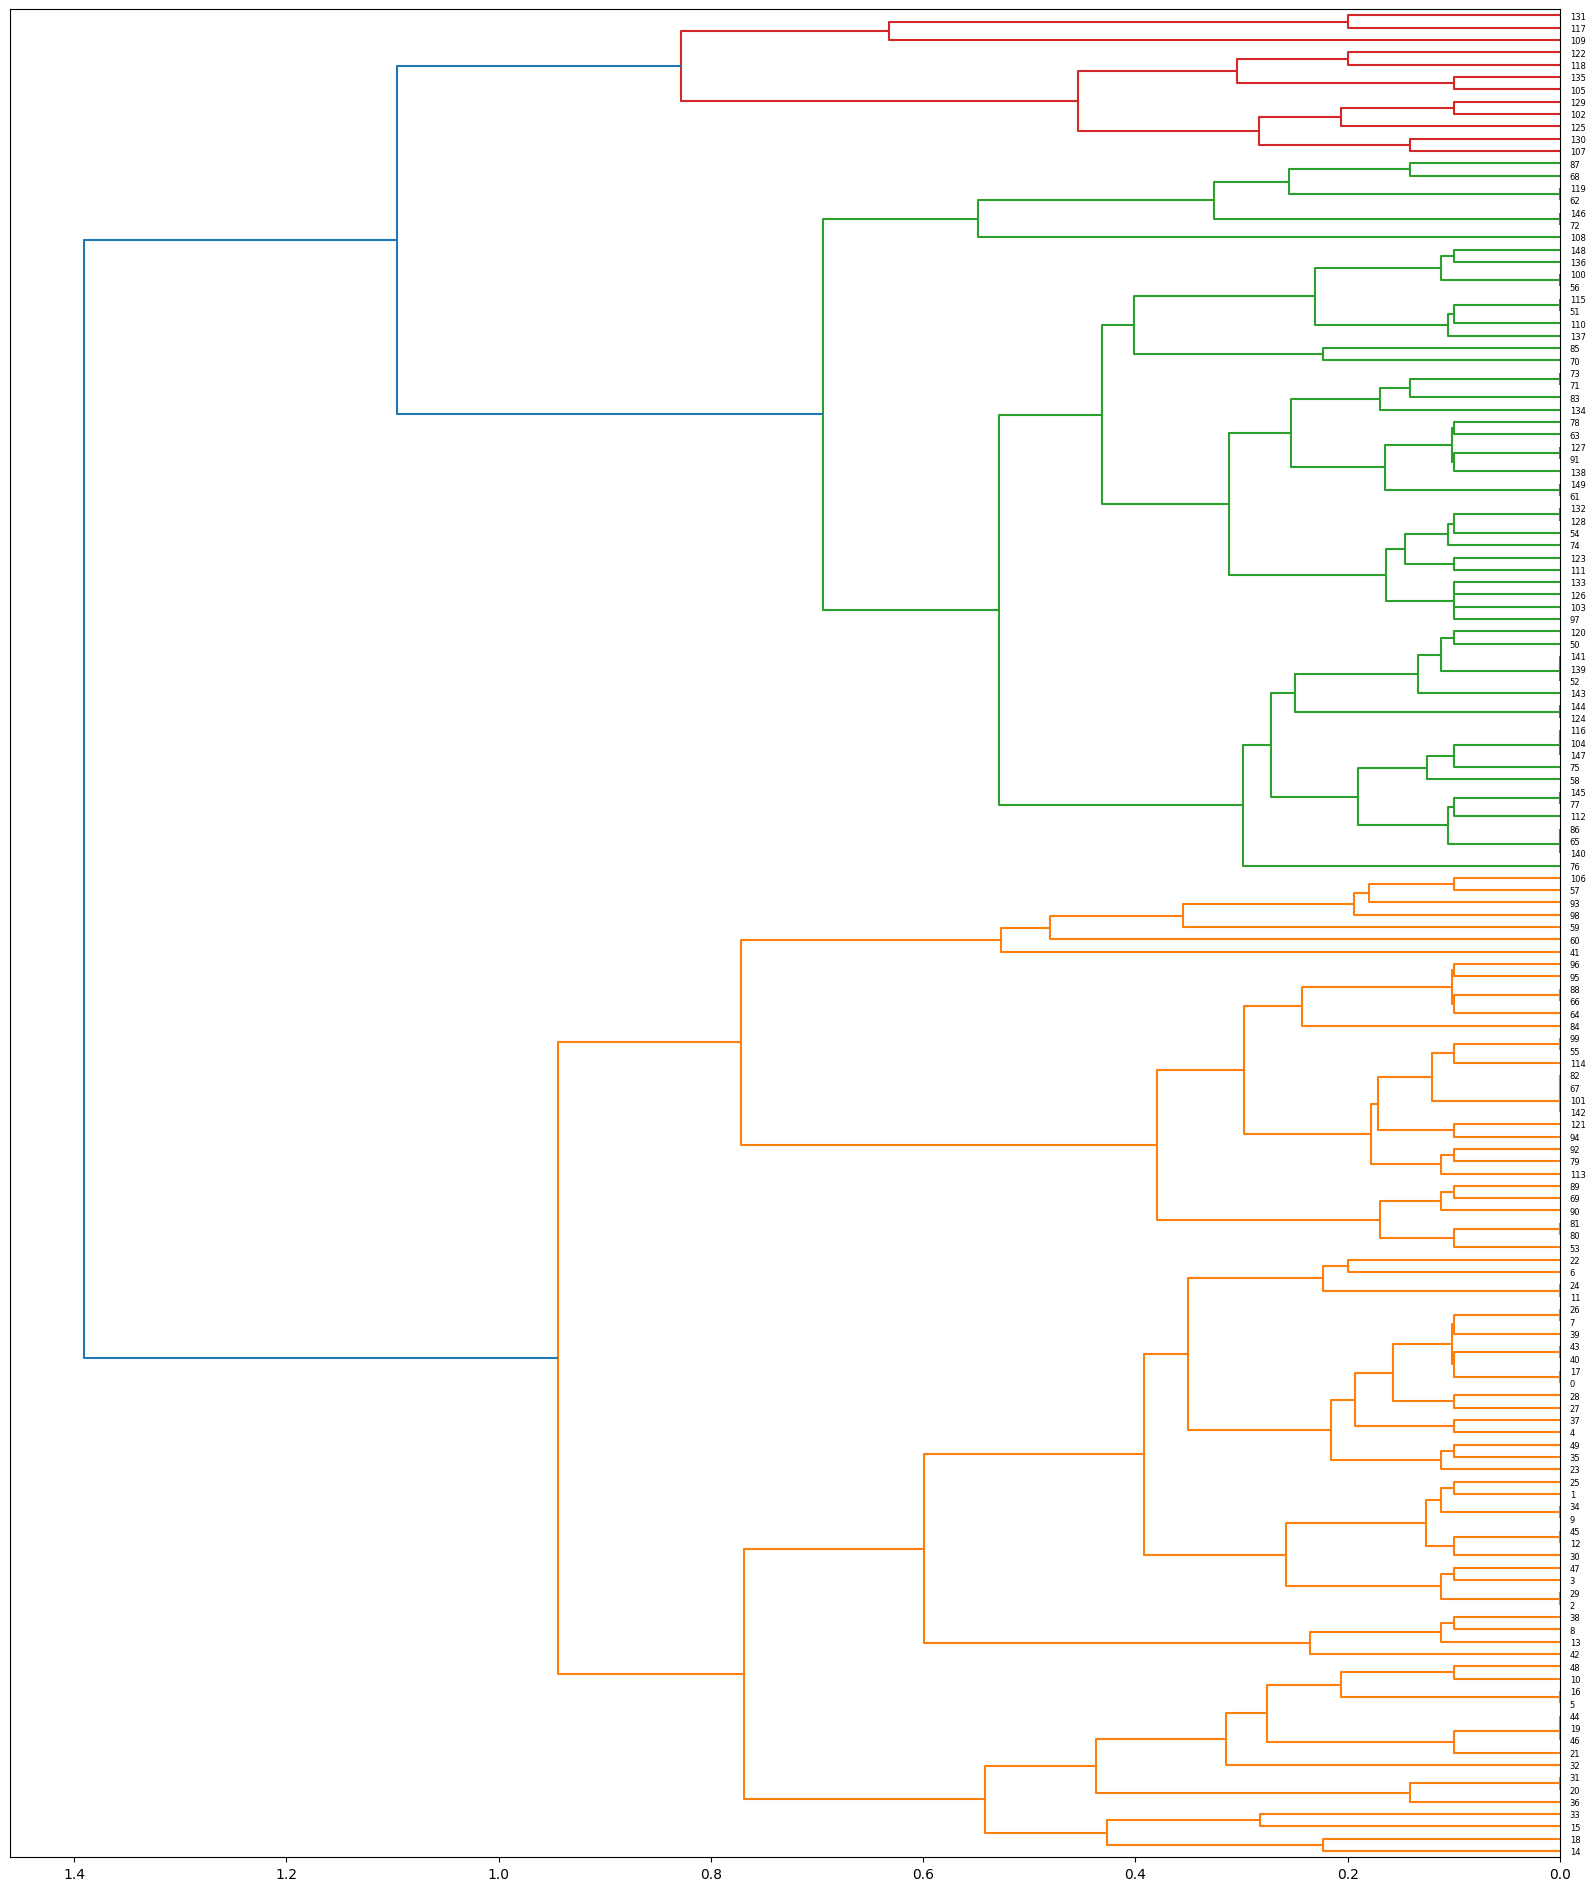

In [17]:
samples3 = iris_frame[['sepal width (cm)','sepal length (cm)']].values
Z = linkage(samples3, method='centroid', metric='euclidean')
_ = dendrogram(Z, leaf_font_size=6, leaf_rotation=0, orientation='left')

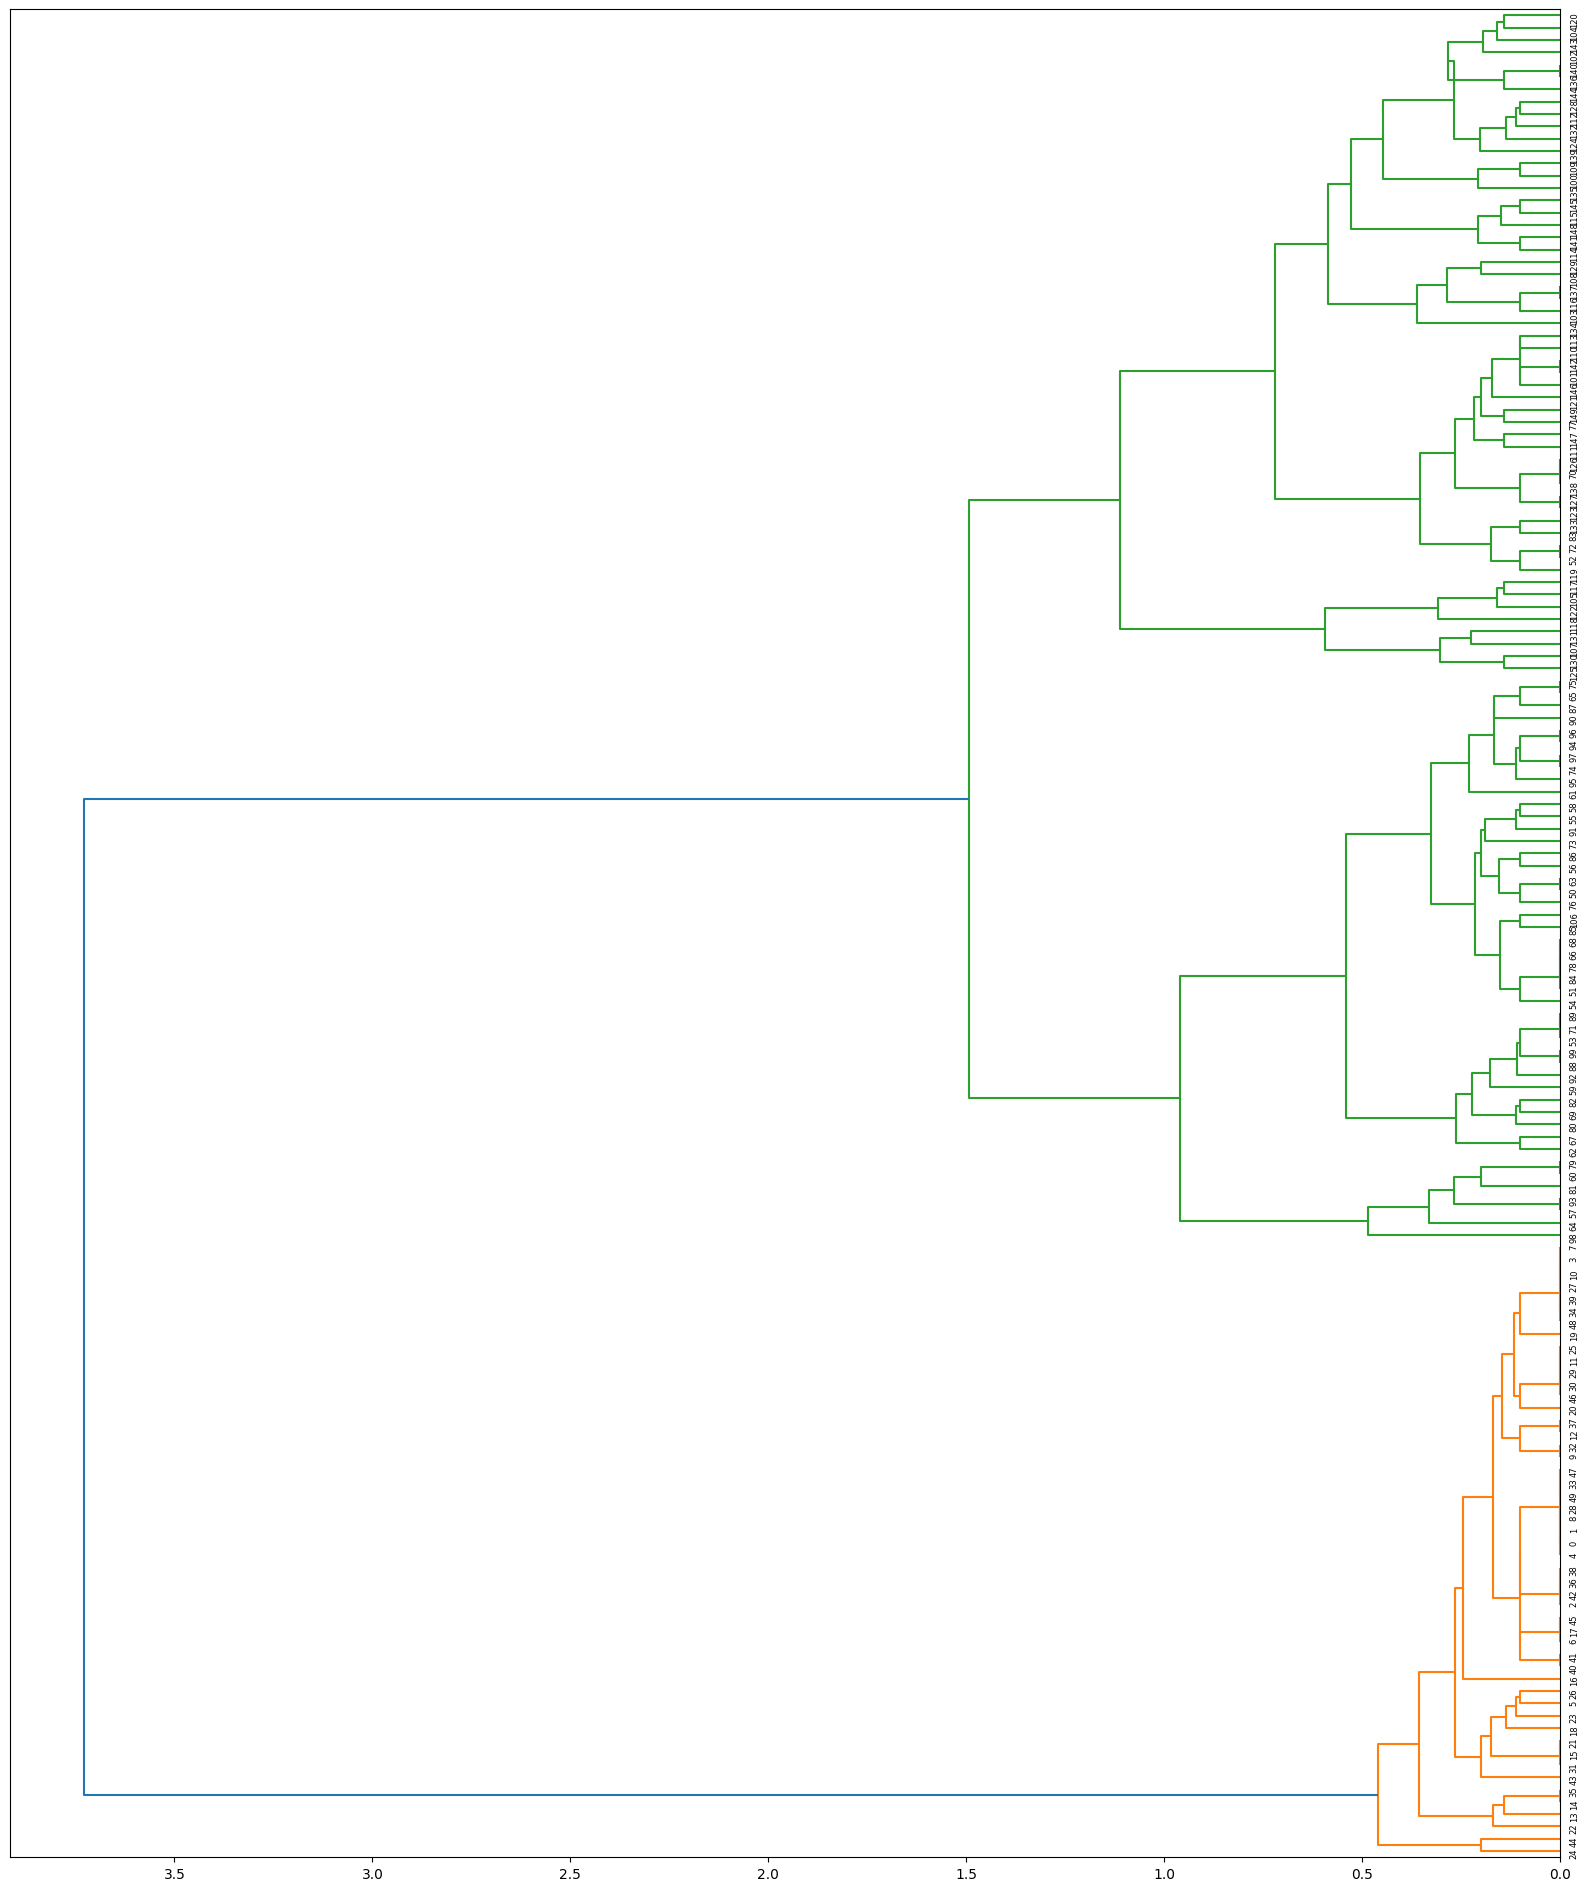

In [18]:
samples4 = iris_frame[['petal width (cm)','petal length (cm)']].values
Z = linkage(samples4, method='centroid', metric='euclidean')
_ = dendrogram(Z, leaf_font_size=6, leaf_rotation=90, orientation='left')

## Практическое задание

1.	Подберите данные, подходящие для решения задачи кластеризации (например данные о клиентах, продавцах и тому подобное). То есть без явных ответов.
2.	Реализуйте два различных метода кластеризации для этого набора данных.
3. Верифицируйте полученное решение с "реальностью". Требуется доказать, что найденное решение действительно лучшее.